# Midterm: Classification Analysis

Name: Mindy Cruz         
Date: 4/6/2025 

__Objective:__

This project demonstrates your ability to apply classification modeling techniques to a real-world dataset. You will:

- Load and explore a dataset.
- Analyze feature distributions and consider feature selection.
- Train and evaluate a classification model.
- Compare different classification approaches.
- Document your work in a structured Jupyter Notebook.
- Conduct a peer review of a classmate’s project.

__Intoduction:__

- using the UCI Mushroom Dataset, I will to predict whether a mushroom is poisonous or edible. 


# Section 1: Import and Inspect the Data

In [2]:
# imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from matplotlib.colors import ListedColormap

__1.1 Load Dataset and Display__

*UCI Mushroom Dataset*

In [3]:
#load dataset 
df= pd.read_csv(r"C:\Users\cruzm\44670 Projects\applied-ml-mcruz\midterm\agaricus-lepiota.data", delimiter=",", header= None)

#display the column names, null counts and datatypes
df.info()

#assign headers
headers = [
    'poisonous', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 
    'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 
    'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 
    'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat'
]

df.columns=headers
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       8124 non-null   object
 1   1       8124 non-null   object
 2   2       8124 non-null   object
 3   3       8124 non-null   object
 4   4       8124 non-null   object
 5   5       8124 non-null   object
 6   6       8124 non-null   object
 7   7       8124 non-null   object
 8   8       8124 non-null   object
 9   9       8124 non-null   object
 10  10      8124 non-null   object
 11  11      8124 non-null   object
 12  12      8124 non-null   object
 13  13      8124 non-null   object
 14  14      8124 non-null   object
 15  15      8124 non-null   object
 16  16      8124 non-null   object
 17  17      8124 non-null   object
 18  18      8124 non-null   object
 19  19      8124 non-null   object
 20  20      8124 non-null   object
 21  21      8124 non-null   object
 22  22      8124 non-null   

In [4]:
#display the first 10 rows
print(df.head(10))


  poisonous cap-shape cap-surface cap-color bruises odor gill-attachment  \
0         p         x           s         n       t    p               f   
1         e         x           s         y       t    a               f   
2         e         b           s         w       t    l               f   
3         p         x           y         w       t    p               f   
4         e         x           s         g       f    n               f   
5         e         x           y         y       t    a               f   
6         e         b           s         w       t    a               f   
7         e         b           y         w       t    l               f   
8         p         x           y         w       t    p               f   
9         e         b           s         y       t    a               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b 

__1.2 Check for missing values and display summary statistics__

In [5]:

#check for missing values
print("Missing Values:")
print(df.isnull().sum())


Missing Values:
poisonous                   0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64


In [6]:
#display summary stats
print(df.describe())

       poisonous cap-shape cap-surface cap-color bruises  odor  \
count       8124      8124        8124      8124    8124  8124   
unique         2         6           4        10       2     9   
top            e         x           y         n       f     n   
freq        4208      3656        3244      2284    4748  3528   

       gill-attachment gill-spacing gill-size gill-color  ...  \
count             8124         8124      8124       8124  ...   
unique               2            2         2         12  ...   
top                  f            c         b          b  ...   
freq              7914         6812      5612       1728  ...   

       stalk-surface-below-ring stalk-color-above-ring stalk-color-below-ring  \
count                      8124                   8124                   8124   
unique                        4                      9                      9   
top                           s                      w                      w   
freq               

__Reflection 1:__

*1.What do you notice about the dataset?*

-no missing data points,  8124 entries, 23 categories/features, dtype is object. 

*2. Are there any data issues?*

 I do not see any issues with the data


## Section 2: Data Exploration and Preparation



__2.1 Explore data patterns and distributions__

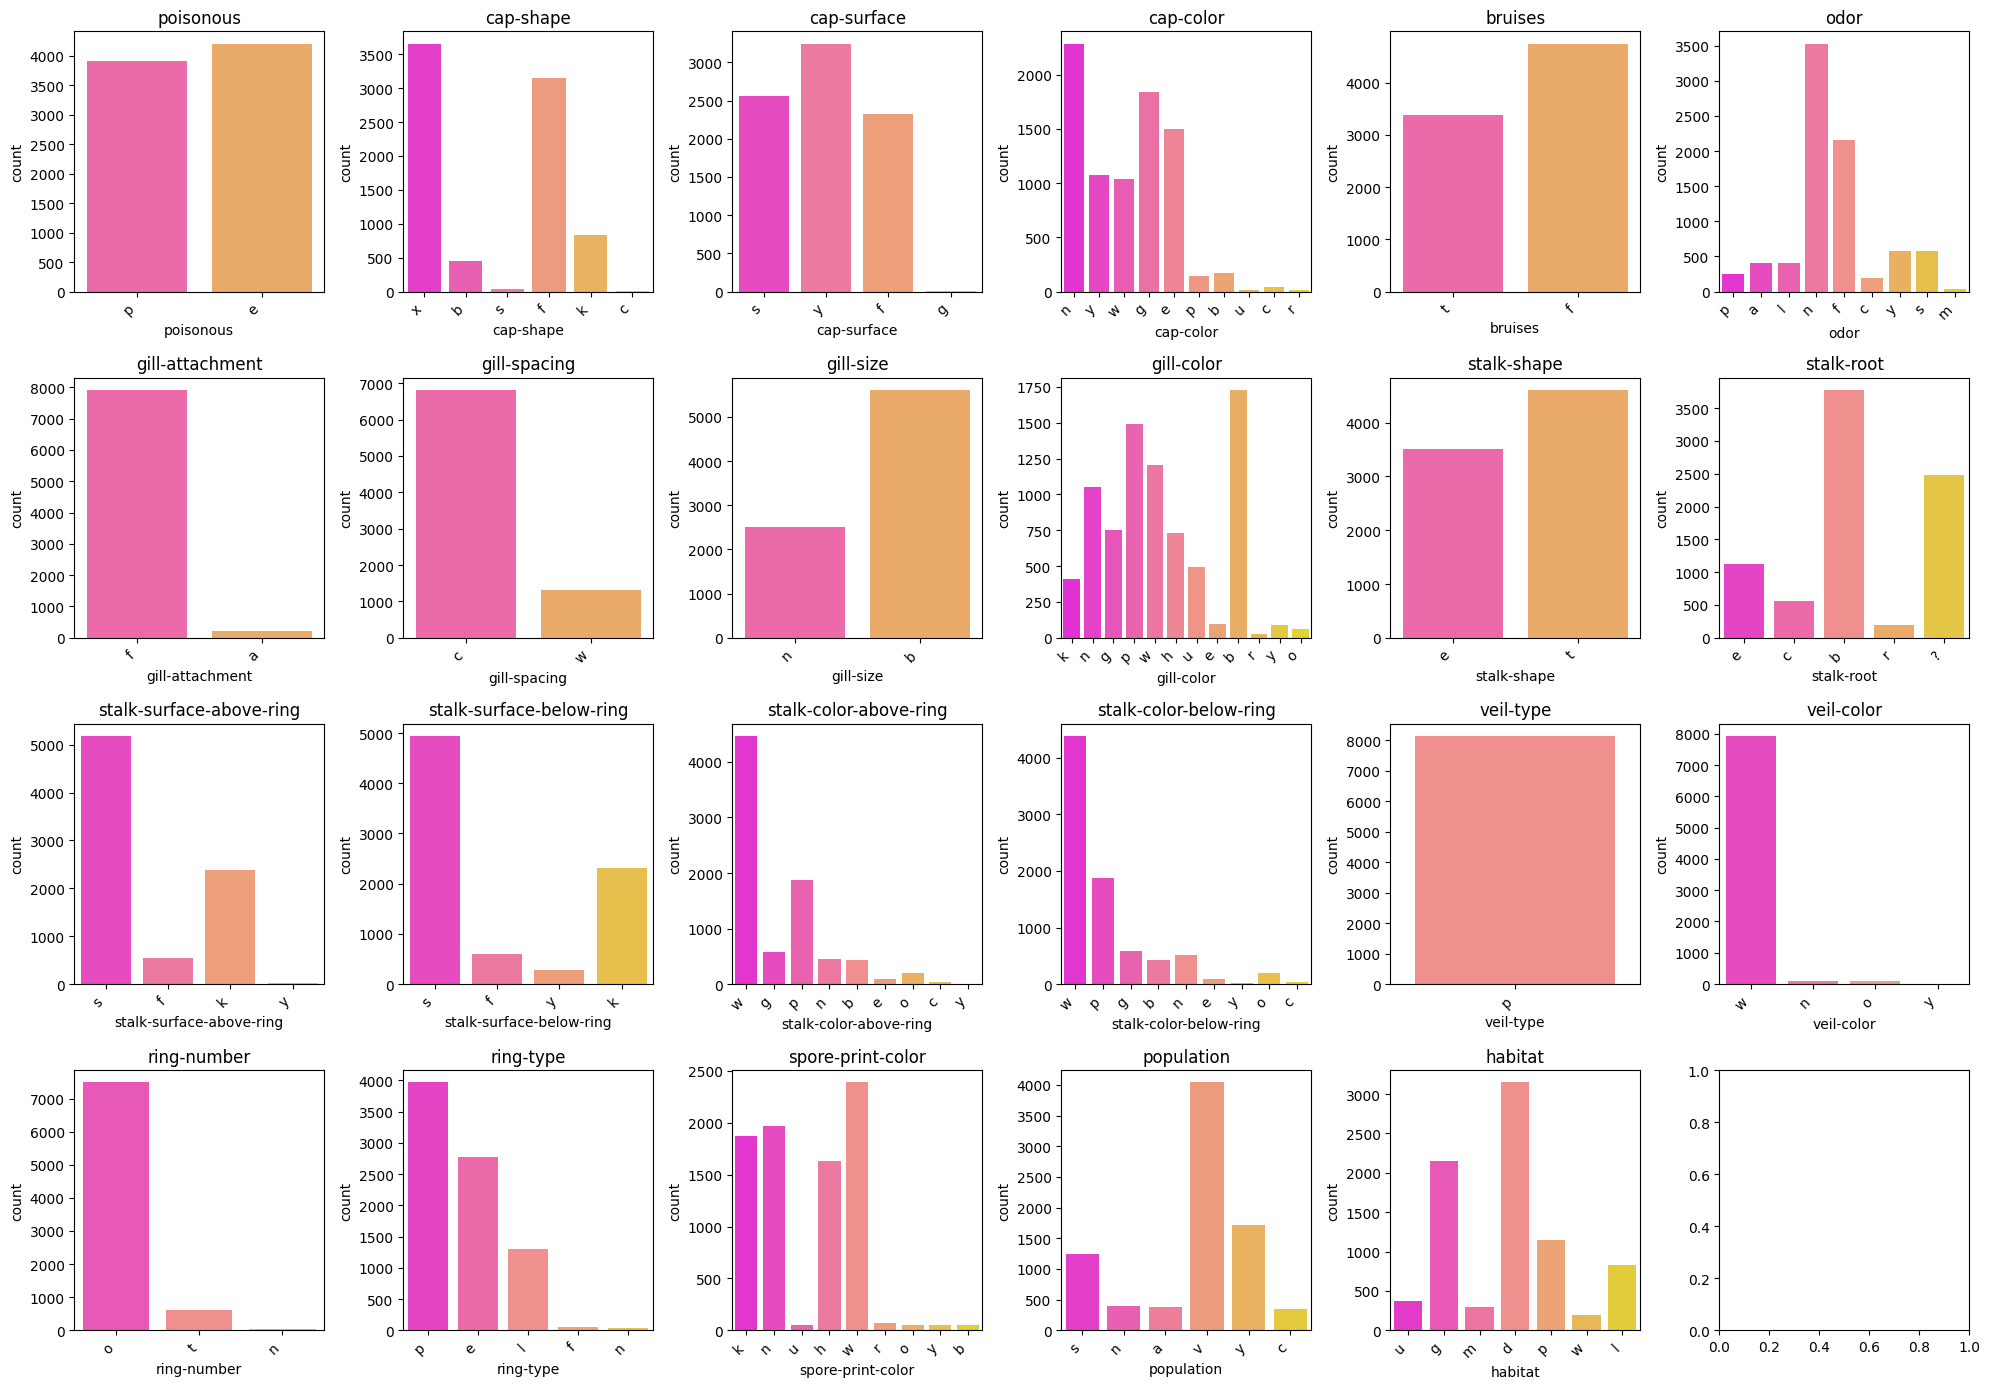

In [16]:
#count plots

def plot_counts(df, column_name, color='spring', ax=None):
    sns.countplot(data=df, x=column_name, hue=column_name, palette=color, legend=False, ax=ax)
    ax.set_title(f'{column_name}')
    
    # Set tick labels and rotate them
    ticks = ax.get_xticks()  
    ax.set_xticks(ticks)  
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")  

# Create a grid for plotting multiple countplots
n_cols = 6 
n_rows = (len(df.columns) // n_cols) + (len(df.columns) % n_cols > 0)  
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 14)) 
axes = axes.flatten()  


for i, column in enumerate(df.columns):
    plot_counts(df, column, color='spring', ax=axes[i])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()